In [ ]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/spam_Emails_data.csv")
print(df.shape) # Add this line to check the dataframe shape

(428, 2)


In [ ]:
print(df.head())
print(df['label'].value_counts())

  label                                               text
0  Spam  viiiiiiagraaaa\nonly for the ones that want to...
1   Ham  got ice thought look az original message ice o...
2  Spam  yo ur wom an ne eds an escapenumber in ch ma n...
3  Spam  start increasing your odds of success & live s...
4   Ham  author jra date escapenumber escapenumber esca...
label
Ham     226
Spam    202
Name: count, dtype: int64


In [ ]:
# 4. Preprocessing
df['text'] = df['text'].astype(str)  # Ensure all text is string
df['label'] = df['label'].map({'Ham': 0, 'Spam': 1})  # Convert to binary
df.dropna(subset=['label'], inplace=True) # Drop rows with NaN in the label column

In [ ]:
#5. Split Data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 6. Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)


In [ ]:
# 7. Train Model – Naive Bayes
model = MultinomialNB()
model.fit(X_train_tf, y_train)


MultinomialNB()

In [ ]:
#5. Split Data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 6. Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [ ]:
# 7. Train Model – Naive Bayes
model = MultinomialNB()
model.fit(X_train_tf, y_train)

MultinomialNB()

In [ ]:
# Check unique values in the original 'label' column
print(pd.read_csv("/content/spam_Emails_data.csv")['label'].unique())

['Spam' 'Ham']


In [ ]:
# 8. Predict
y_pred = model.predict(X_test_tf)

In [ ]:
# 9. Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8023255813953488

Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.83        43
           1       1.00      0.60      0.75        43

    accuracy                           0.80        86
   macro avg       0.86      0.80      0.79        86
weighted avg       0.86      0.80      0.79        86



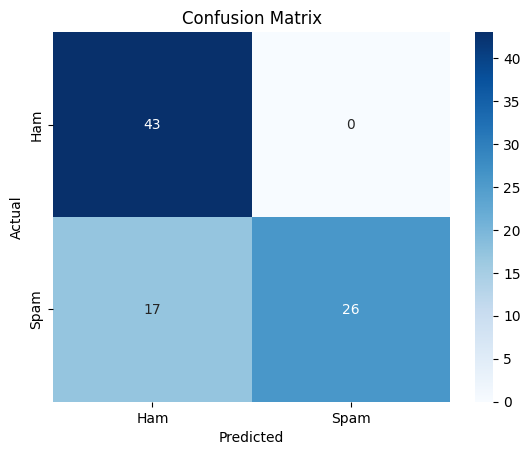

In [ ]:
# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()